In [6]:
import numpy as np
import pandas as pd
from matplotlib.mlab import PCA
import matplotlib.pyplot as plt

from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit import DataStructs
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

In [15]:
# pca computing

def pca(frame, standardize=True):
    p = PCA(frame, standardize=standardize)
    res = pd.DataFrame(p.Y)
    res.index=frame.index
    return res

# visualization

def visualize_scatter(matrix, axis): #, labels=None, **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x=matrix[axis[0]],y=matrix[axis[1]])
    # ax.scatter(x=matrix[x:y][axis[0]],y=matrix[x:y][axis[1]], C="red")  for different color points, show has to be used after all plot processing
    for idx in matrix.index:
        pass
        #ax.annotate(idx, (matrix[axis[0]][idx],matrix[axis[1]][idx]))
    #return fig

In [7]:
suppl = ch.SDMolSupplier('../data/drugbank.sdf')

lip_func = [Lipinski.NumHAcceptors, Lipinski.NumHDonors, Descriptors.ExactMolWt, Descriptors.MolLogP, rdMolDescriptors.CalcTPSA, Lipinski.NumRotatableBonds]
mols = [x for x in suppl if x is not None]

drugbank = {}

for mol in mols:
    drugbank[mol.GetProp("DRUGBANK_ID")] = [f(mol) for f in lip_func]

In [8]:
keys = [k for k in drugbank.keys()]

series={}
index = ["HBA", "HBD", "MW", "logP", "TPSA", "RBs"]
for k in keys[:100]:
    sample_id = k
    row = drugbank[k]
    series[sample_id] = pd.Series(row, index=index)
frame1 = pd.DataFrame(series, index=index).transpose()

series={}
for k in keys[1000:1100]:
    sample_id = k
    row = drugbank[k]
    series[sample_id] = pd.Series(row, index=index)
frame2 = pd.DataFrame(series, index=index).transpose()

pd.DataFrame(series, index=index)

,DB01124,DB01125,DB01126,DB01127,DB01128,DB01129,DB01130,DB01131,DB01132,DB01133,...,DB01214,DB01215,DB01216,DB01217,DB01218,DB01219,DB01220,DB01221,DB01222,DB01223
HBA,3.000000,3.000000,2.000000,3.000000,5.000000,5.000000,8.000000,1.000000,5.000000,3.00000,...,5.000000,4.000000,2.000000,5.000000,2.000000,6.000000,13.000000,2.000000,6.000000,12.000000
HBD,2.000000,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,3.000000,1.000000,4.00000,...,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,5.000000,1.000000,2.000000,4.000000
MW,270.103813,252.078644,528.221148,380.024996,430.061041,359.130363,488.241018,253.109423,356.119463,317.92836,...,309.194008,294.067224,372.277678,293.164046,499.165655,314.065119,785.352359,237.092042,430.235539,420.198199
logP,1.783020,2.858000,6.576100,5.801400,2.879580,2.989420,3.699300,1.789700,3.159600,2.07110,...,2.274860,3.271700,3.814500,2.928760,8.644300,1.740500,6.157840,2.897800,2.716800,-3.175600
TPSA,75.270000,43.370000,58.200000,27.050000,107.260000,77.100000,116.200000,88.790000,68.290000,115.06000,...,67.790000,43.070000,58.200000,78.290000,23.470000,118.050000,198.380000,29.100000,93.060000,197.400000
RBs,5.000000,2.000000,2.000000,6.000000,5.000000,8.000000,6.000000,2.000000,7.000000,4.00000,...,7.000000,1.000000,1.000000,4.000000,10.000000,4.000000,2.000000,2.000000,4.000000,1.000000


In [24]:
frame2

,HBA,HBD,MW,logP,TPSA,RBs
DB01124,3.0,2.0,270.103813,1.78302,75.27,5.0
DB01125,3.0,0.0,252.078644,2.85800,43.37,2.0
DB01126,2.0,2.0,528.221148,6.57610,58.20,2.0
DB01127,3.0,0.0,380.024996,5.80140,27.05,6.0
DB01128,5.0,2.0,430.061041,2.87958,107.26,5.0
DB01129,5.0,1.0,359.130363,2.98942,77.10,8.0
DB01130,8.0,1.0,488.241018,3.69930,116.20,6.0
DB01131,1.0,3.0,253.109423,1.78970,88.79,2.0
DB01132,5.0,1.0,356.119463,3.15960,68.29,7.0
DB01133,3.0,4.0,317.928360,2.07110,115.06,4.0


In [10]:
pca1 = pca(frame1)
pca2 = pca(frame2)
pca3 = pca(frame2, standardize=False)

/root/miniconda3/envs/pnl2/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The PCA class was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  after removing the cwd from sys.path.


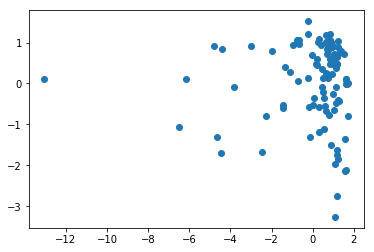

In [16]:
visualize_scatter(pca1, (0,1))

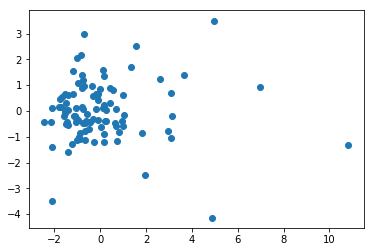

In [17]:
visualize_scatter(pca2, (0,1))

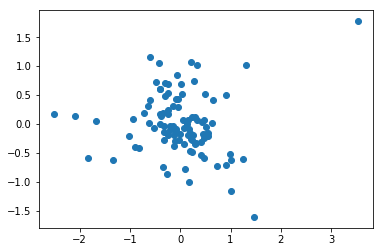

In [18]:
visualize_scatter(pca2, (2,3))

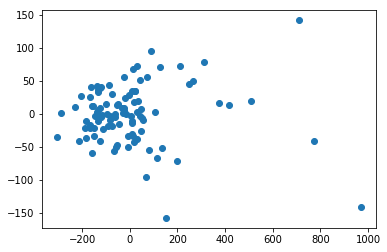

In [19]:
visualize_scatter(pca3, (0,1))